**Importing Required Libraries**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

import warnings
warnings.filterwarnings('ignore')

In [17]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

In [18]:
len(X_train) , len(X_test)

(60000, 10000)

In [19]:
X_train[0].shape             # Every sample is 28*28 Pixel.

(28, 28)

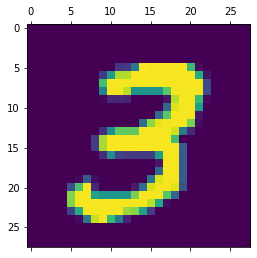

In [20]:
plt.matshow(X_train[7])  # 7th Image in the Data

**y_train contains number from 0 to 9. It shows exactly the number is in the image**

In [21]:
y_train[7]    

3

**We can Scale our data for better accuracy.So,every values are in between 0 to 255. So,that we can divide with 255**

In [22]:
X_train = X_train / 255
X_test = X_test / 255

In [23]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

**Now,values come between 0 to 1.**

In [24]:
X_train.shape

(60000, 28, 28)

**Now, we need to make our data into a flattern so that we can make 1 D, which will feed into Input layer.**

In [25]:
# To flattern the shape 

X_train_flattend = X_train.reshape(len(X_train), 28*28)
print(X_train_flattend)

print('-'*25)

X_test_flattend = X_test.reshape(len(X_test), 28*28)
print(X_test_flattend)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
-------------------------
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [26]:
X_train_flattend.shape

(60000, 784)

**Creating ANN**

In [27]:
model = Sequential()

model.add(Flatten(input_shape = (784,)))

model.add(Dense(512, kernel_initializer = 'ones',bias_initializer = 'zeros', activation='softmax'))

model.add(Dense(284, activation='relu'))

model.add(Dense(125, activation='relu'))

model.add(Dense(10, activation='sigmoid'))        


model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 284)               145692    
_________________________________________________________________
dense_10 (Dense)             (None, 125)               35625     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1260      
Total params: 584,497
Trainable params: 584,497
Non-trainable params: 0
_________________________________________________________________


In [28]:
checkpoint = ModelCheckpoint("ANN_MNIST.hdf5", monitor='loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(X_train_flattend, y_train, validation_data= (X_test_flattend, y_test), epochs= 10, 
                    verbose = 1, callbacks= [checkpoint])

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.6947 - accuracy: 0.7732 - val_loss: 0.1598 - val_accuracy: 0.9527

Epoch 00001: loss improved from inf to 0.33840, saving model to ANN_MNIST.hdf5
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1306 - accuracy: 0.9617 - val_loss: 0.1213 - val_accuracy: 0.9646

Epoch 00002: loss improved from 0.33840 to 0.12887, saving model to ANN_MNIST.hdf5
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0961 - accuracy: 0.9712 - val_loss: 0.1252 - val_accuracy: 0.9626

Epoch 00003: loss improved from 0.12887 to 0.09762, saving model to ANN_MNIST.hdf5
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0774 - accuracy: 0.9771 - val_loss: 0.1174 - val_accuracy: 0.9685

Epoch 00004: loss improved from 0.09762 to 0.07912, saving model to ANN_MNIST.hdf5
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0610 - ac

In [29]:
weights = model.layers[4].get_weights()[0]
biases = model.layers[4].get_weights()[1]

In [30]:
print("Final Weights: ",weights)

Final Weights:  [[-0.36833635  0.01852441  0.14085622 ... -0.21370794  0.30177358
   0.14075755]
 [ 0.25437623 -0.14732184 -0.05354071 ...  0.01476598  0.04187087
   0.0998179 ]
 [ 0.05727333 -0.5950231  -0.44211704 ...  0.25216976 -0.30503064
  -0.07832883]
 ...
 [-0.12643597 -0.1220481   0.01864609 ... -0.16297232  0.04031733
  -0.13346264]
 [ 0.12350909 -0.31677023  0.03265736 ... -0.39966005  0.04881183
  -0.27501583]
 [-0.43383023 -0.1130578   0.04981224 ...  0.09132676  0.01445529
  -0.2834465 ]]


In [31]:
print("Final Bias: ",biases)

Final Bias:  [-0.1122189  -0.06736778  0.02267023 -0.0315478  -0.03500042 -0.00616569
 -0.10815256 -0.00206907  0.14246534  0.06598357]


In [32]:
_, train_acc = model.evaluate(X_train_flattend, y_train)
_, test_acc = model.evaluate(X_test_flattend, y_test)

print("\nTrain_Accuracy : %.2f, Test_Accuracy: %.2f" %(train_acc, test_acc))

313/313 [==============================] - 1s 4ms/step - loss: 0.1186 - accuracy: 0.9702

Train_Accuracy : 0.99, Test_Accuracy: 0.97


In [33]:
y_predicted = model.predict(X_test_flattend)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [34]:
print(classification_report(y_test, y_predicted_labels))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.95      0.97      0.96      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.97      0.97       958
           7       0.98      0.96      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.94      0.96      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



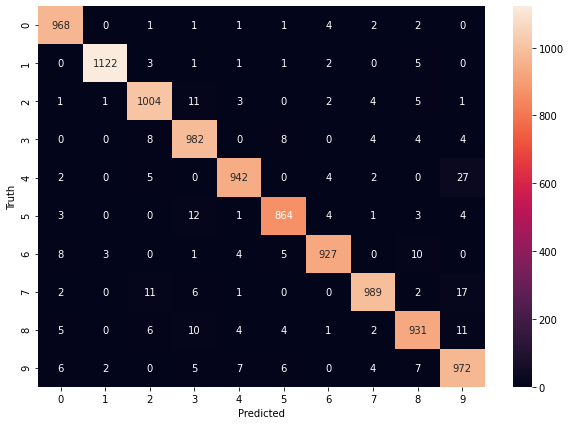

In [35]:
cm = confusion_matrix(y_test, y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

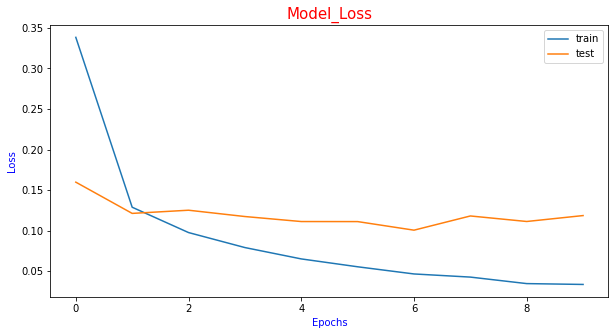

In [36]:
# plot loss during training
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model_Loss',size = 15, color = 'r')
plt.xlabel('Epochs', size = 10, color = 'b')
plt.ylabel('Loss', size = 10, color = 'b')
plt.legend()
plt.show()

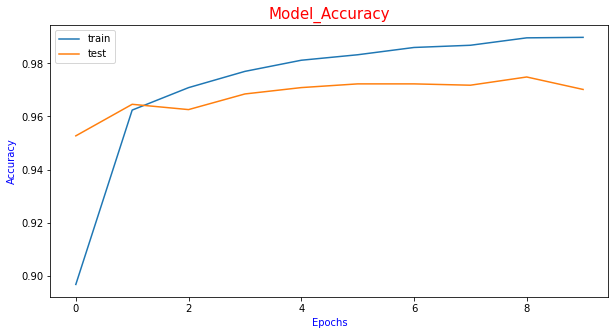

In [37]:
# plot Accuracy during training
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model_Accuracy', size = 15, color= 'r')
plt.xlabel('Epochs', size = 10, color = 'b')
plt.ylabel('Accuracy', size = 10, color = 'b')
plt.legend()

# Thank You